<a href="https://colab.research.google.com/github/aabelatilaw/COVID-19-Prediction-Using-AI/blob/main/Covid_19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
import pandas as pd

# Use the 'raw' URL for the CSV file
url = 'https://raw.githubusercontent.com/aabelatilaw/COVID-19-Prediction-Using-AI/main/covid_19.csv'

# Load the data into a DataFrame
data = pd.read_csv(url)

In [ ]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [ ]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/119AKo4OyprJoNvAIN2ag84doBiyGwkpDanrL3kBpX6w#gid=0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
data.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


In [ ]:
# Missing Values Analysis
# Calculate missing values count and percentage
missing_counts = data.isnull().sum()
missing_percentages = (data.isnull().sum() / len(data)) * 100
missing_table = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percentages.values.round(2)
})
print("\nMissing Values Table:")
print(missing_table)


Missing Values Table:
           Column  Missing_Count  Missing_Percentage
0  Province/State          34404               70.11
1  Country/Region              0                0.00
2             Lat              0                0.00
3            Long              0                0.00
4            Date              0                0.00
5       Confirmed              0                0.00
6          Deaths              0                0.00
7       Recovered              0                0.00
8          Active              0                0.00
9      WHO Region              0                0.00


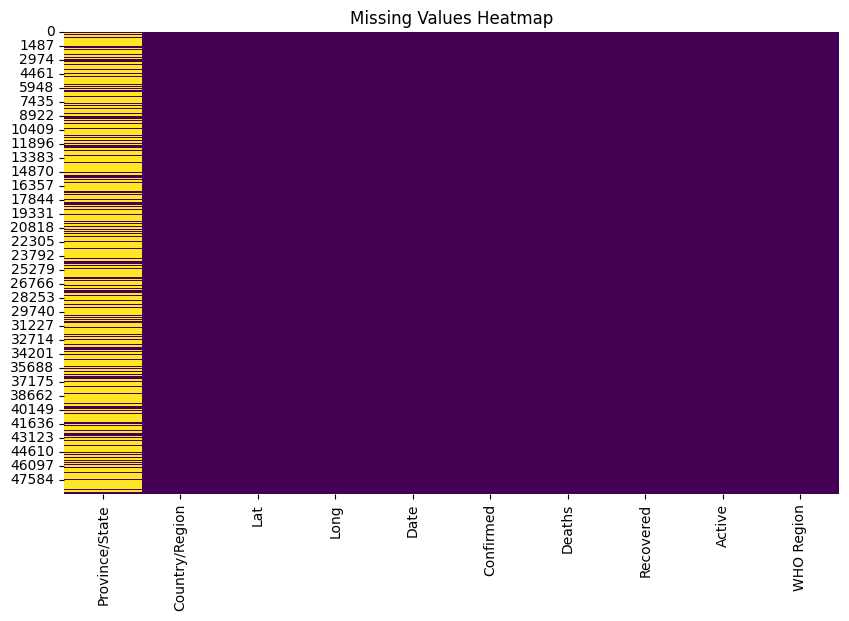

In [ ]:
# Missing Values Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
# Step 2: Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
hubei_data = data[data['Province/State'] == 'Hubei'].copy()
hubei_data['Days'] = (hubei_data['Date'] - hubei_data['Date'].min()).dt.days
hubei_data = hubei_data[['Date', 'Days', 'Confirmed', 'Deaths', 'Recovered']]
hubei_data.fillna(0, inplace=True)
print("\nPreprocessed Hubei Data:")
print(hubei_data.head())


Preprocessed Hubei Data:
           Date  Days  Confirmed  Deaths  Recovered
61   2020-01-22     0        444      17         28
322  2020-01-23     1        444      17         28
583  2020-01-24     2        549      24         31
844  2020-01-25     3        761      40         32
1105 2020-01-26     4       1058      52         42


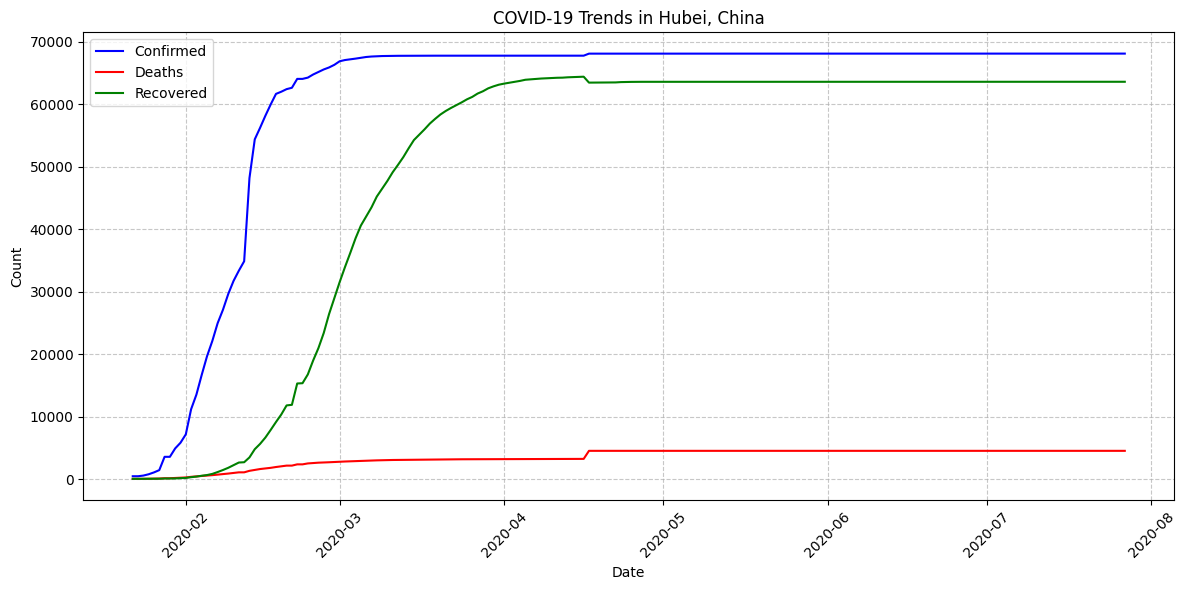

In [ ]:
# Step 3: EDA
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(hubei_data['Date'], hubei_data['Confirmed'], label='Confirmed', color='blue')
plt.plot(hubei_data['Date'], hubei_data['Deaths'], label='Deaths', color='red')
plt.plot(hubei_data['Date'], hubei_data['Recovered'], label='Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Trends in Hubei, China')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

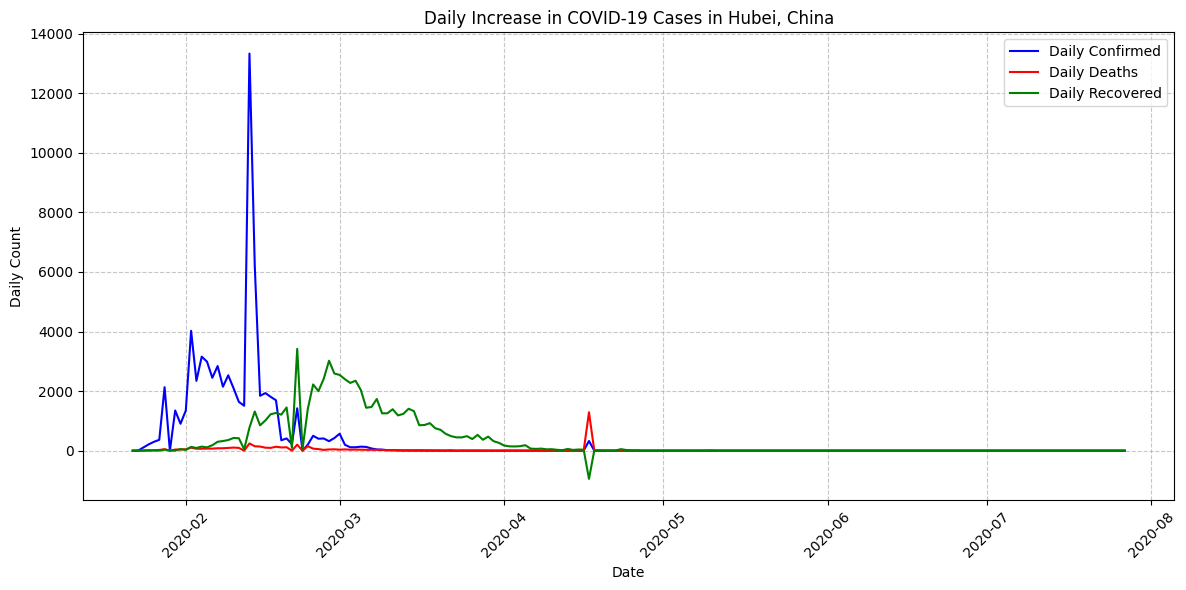

In [ ]:
# Daily Increase
hubei_data['Daily_Confirmed'] = hubei_data['Confirmed'].diff().fillna(0)
hubei_data['Daily_Deaths'] = hubei_data['Deaths'].diff().fillna(0)
hubei_data['Daily_Recovered'] = hubei_data['Recovered'].diff().fillna(0)
plt.figure(figsize=(12, 6))
plt.plot(hubei_data['Date'], hubei_data['Daily_Confirmed'], label='Daily Confirmed', color='blue')
plt.plot(hubei_data['Date'], hubei_data['Daily_Deaths'], label='Daily Deaths', color='red')
plt.plot(hubei_data['Date'], hubei_data['Daily_Recovered'], label='Daily Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Count')
plt.title('Daily Increase in COVID-19 Cases in Hubei, China')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

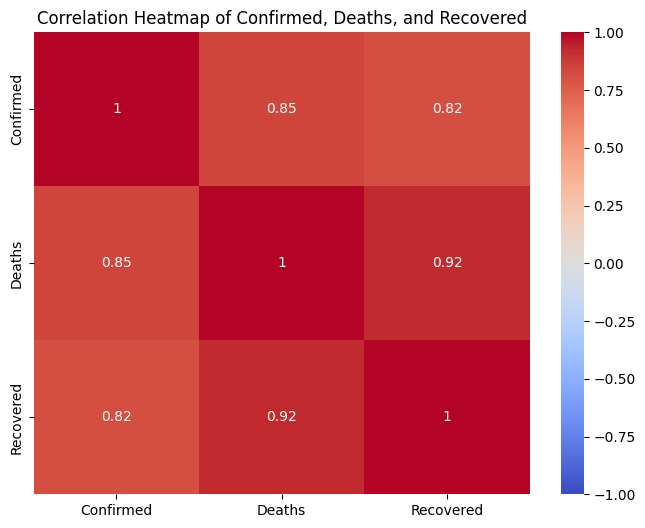

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = hubei_data[['Confirmed', 'Deaths', 'Recovered']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Confirmed, Deaths, and Recovered')
plt.show()

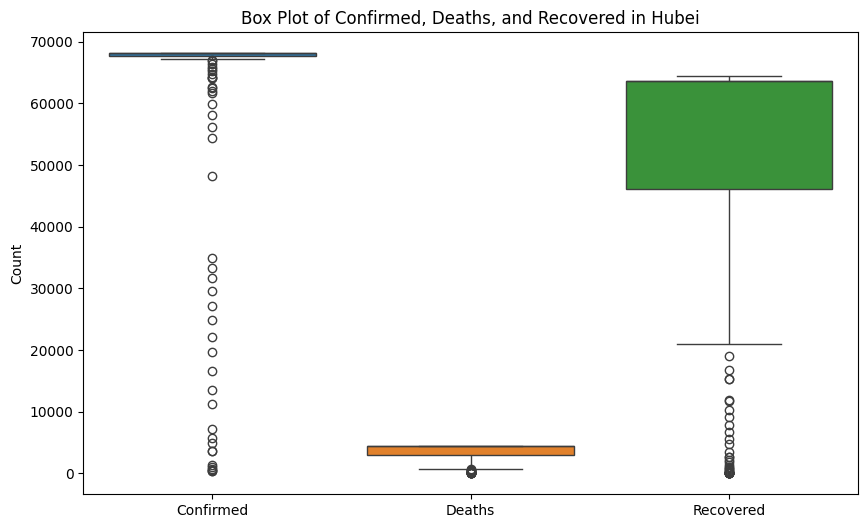

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=hubei_data[['Confirmed', 'Deaths', 'Recovered']])
plt.title('Box Plot of Confirmed, Deaths, and Recovered in Hubei')
plt.ylabel('Count')
plt.show()

In [ ]:
# Step 4: Train Models with Table Output
def train_model(X, y, target_name, dates):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    date_test = dates[X_train.shape[0]:]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nResults for {target_name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")

    pred_table = pd.DataFrame({
        'Date': date_test,
        'Days': X_test.flatten(),
        f'Actual_{target_name}': y_test,
        f'Predicted_{target_name}': y_pred.round(0).astype(int)
    })
    print(f"\nPrediction Table for {target_name} (Test Set):")
    print(pred_table.head(10))

    return model, X_test, y_test, y_pred, pred_table

X = hubei_data[['Days']].values
dates = hubei_data['Date'].values
y_confirmed = hubei_data['Confirmed'].values
y_deaths = hubei_data['Deaths'].values
y_recovered = hubei_data['Recovered'].values

model_confirmed, X_test, y_test_conf, y_pred_conf, conf_table = train_model(X, y_confirmed, "Confirmed", dates)
model_deaths, _, y_test_deaths, y_pred_deaths, deaths_table = train_model(X, y_deaths, "Deaths", dates)
model_recovered, _, y_test_rec, y_pred_rec, rec_table = train_model(X, y_recovered, "Recovered", dates)


Results for Confirmed:
Mean Squared Error: 200685937.86
R² Score: 0.40

Prediction Table for Confirmed (Test Set):
        Date  Days  Actual_Confirmed  Predicted_Confirmed
0 2020-06-20   183             68135                78884
1 2020-06-21   162             68135                74765
2 2020-06-22    18             29631                46520
3 2020-06-23    15             22112                45932
4 2020-06-24    67             67801                56131
5 2020-06-25   108             68129                64173
6 2020-06-26    45             67666                51816
7 2020-06-27    76             67803                57896
8 2020-06-28    16             24953                46128
9 2020-06-29   146             68135                71626

Results for Deaths:
Mean Squared Error: 430465.23
R² Score: 0.79

Prediction Table for Deaths (Test Set):
        Date  Days  Actual_Deaths  Predicted_Deaths
0 2020-06-20   183           4512              5472
1 2020-06-21   162           4512  

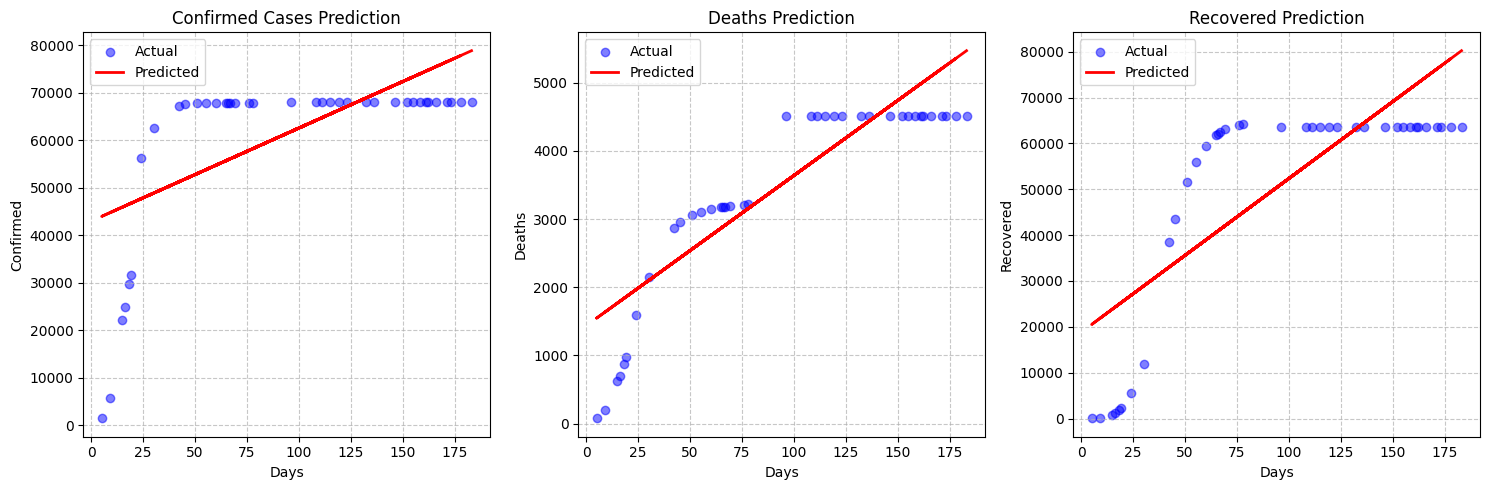

In [ ]:
# Step 5: Visualize Predictions
# Actual vs Predicted
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test_conf, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred_conf, color='red', label='Predicted', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Confirmed')
plt.title('Confirmed Cases Prediction')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test_deaths, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred_deaths, color='red', label='Predicted', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Deaths')
plt.title('Deaths Prediction')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test_rec, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred_rec, color='red', label='Predicted', linewidth=2)
plt.xlabel('Days')
plt.ylabel('Recovered')
plt.title('Recovered Prediction')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

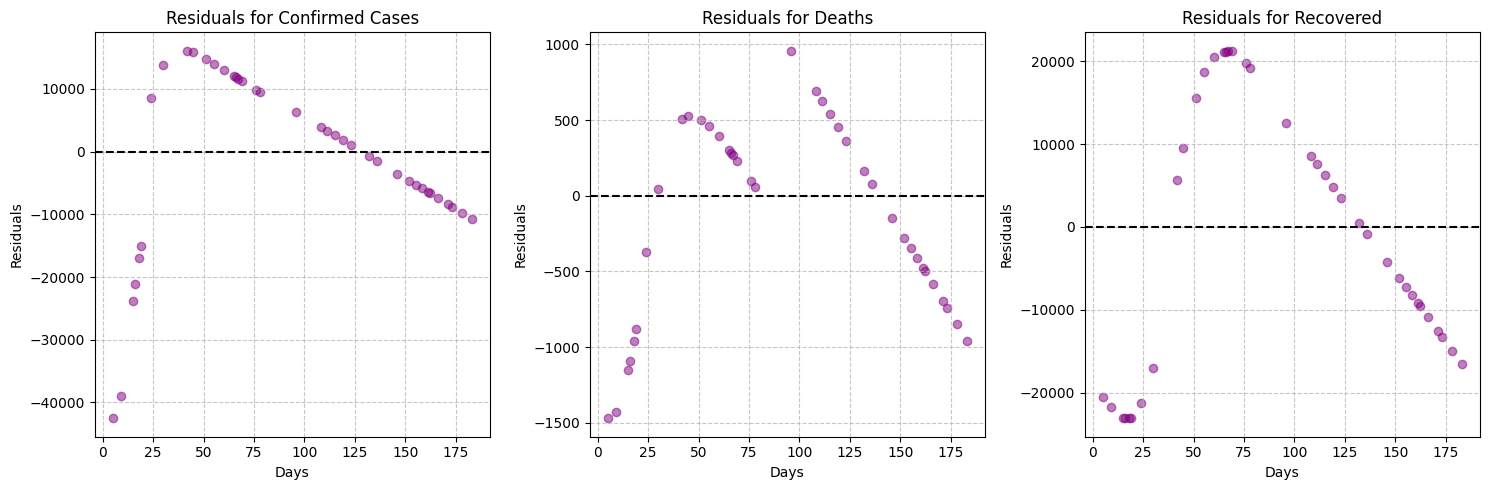

In [ ]:
# Residual Plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
residuals_conf = y_test_conf - y_pred_conf
plt.scatter(X_test, residuals_conf, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.title('Residuals for Confirmed Cases')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 2)
residuals_deaths = y_test_deaths - y_pred_deaths
plt.scatter(X_test, residuals_deaths, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.title('Residuals for Deaths')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 3, 3)
residuals_rec = y_test_rec - y_pred_rec
plt.scatter(X_test, residuals_rec, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Residuals')
plt.title('Residuals for Recovered')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Step 6: Future Predictions with Table
last_day = hubei_data['Days'].max()
future_days = np.array([[last_day + i] for i in range(1, 11)])
future_confirmed = model_confirmed.predict(future_days)
future_deaths = model_deaths.predict(future_days)
future_recovered = model_recovered.predict(future_days)

future_dates = pd.date_range(start=hubei_data['Date'].max() + pd.Timedelta(days=1), periods=10)
future_df = pd.DataFrame({
    'Date': future_dates,
    'Days': future_days.flatten(),
    'Predicted_Confirmed': future_confirmed.round(0).astype(int),
    'Predicted_Deaths': future_deaths.round(0).astype(int),
    'Predicted_Recovered': future_recovered.round(0).astype(int)
})

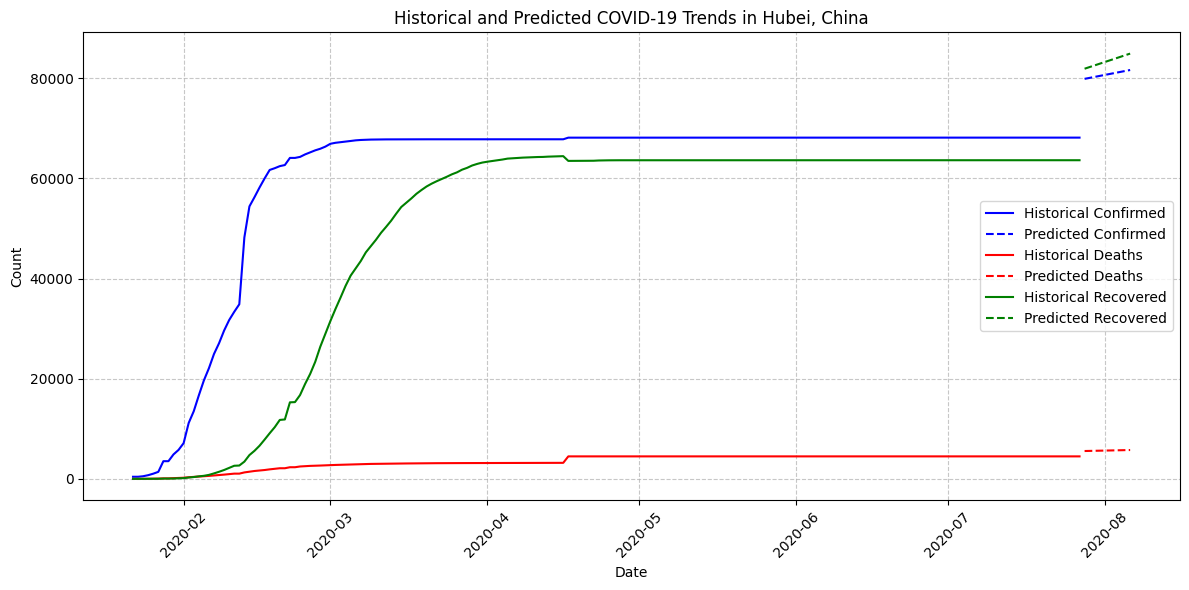

In [ ]:
# Plot historical and predicted data
combined_df = pd.concat([hubei_data[['Date', 'Confirmed', 'Deaths', 'Recovered']],
                         future_df[['Date', 'Predicted_Confirmed', 'Predicted_Deaths', 'Predicted_Recovered']].rename(columns={
                             'Predicted_Confirmed': 'Confirmed',
                             'Predicted_Deaths': 'Deaths',
                             'Predicted_Recovered': 'Recovered'
                         })])
plt.figure(figsize=(12, 6))
plt.plot(hubei_data['Date'], hubei_data['Confirmed'], label='Historical Confirmed', color='blue')
plt.plot(future_df['Date'], future_df['Predicted_Confirmed'], label='Predicted Confirmed', color='blue', linestyle='--')
plt.plot(hubei_data['Date'], hubei_data['Deaths'], label='Historical Deaths', color='red')
plt.plot(future_df['Date'], future_df['Predicted_Deaths'], label='Predicted Deaths', color='red', linestyle='--')
plt.plot(hubei_data['Date'], hubei_data['Recovered'], label='Historical Recovered', color='green')
plt.plot(future_df['Date'], future_df['Predicted_Recovered'], label='Predicted Recovered', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Historical and Predicted COVID-19 Trends in Hubei, China')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Display Future Predictions Table
print("\nFuture Predictions Table (Next 10 Days):")
print(future_df)


Future Predictions Table (Next 10 Days):
        Date  Days  Predicted_Confirmed  Predicted_Deaths  Predicted_Recovered
0 2020-07-28   188                79864              5582                81887
1 2020-07-29   189                80060              5604                82222
2 2020-07-30   190                80257              5626                82557
3 2020-07-31   191                80453              5648                82893
4 2020-08-01   192                80649              5670                83228
5 2020-08-02   193                80845              5692                83563
6 2020-08-03   194                81041              5714                83899
7 2020-08-04   195                81237              5736                84234
8 2020-08-05   196                81433              5758                84570
9 2020-08-06   197                81630              5780                84905


In [ ]:
# Save all tables to CSV
missing_table.to_csv('missing_values.csv', index=False)
conf_table.to_csv('confirmed_predictions.csv', index=False)
deaths_table.to_csv('deaths_predictions.csv', index=False)
rec_table.to_csv('recovered_predictions.csv', index=False)
future_df.to_csv('future_predictions.csv', index=False)
print("\nAll tables saved as CSV files.")


All tables saved as CSV files.
